In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
from epi.models import Parameter, Model
from epi.util import pairplot
import tensorflow as tf
from epi.SC_Circuit_4 import SC_acc, SC_sim, unwrap

### 1. Define the V1Circuit model

In [2]:
lb = -5.
ub = 5.

sW = Parameter("sW", 1, lb=lb, ub=ub)
vW = Parameter("vW", 1, lb=lb, ub=ub)
dW = Parameter("dW", 1, lb=lb, ub=ub)
hW = Parameter("hW", 1, lb=lb, ub=ub)

parameters = [sW, vW, dW, hW]

model = Model("SC_Circuit", parameters)

In [3]:
model.set_eps(SC_acc)
mu_std = 0.1

epi_df = model.get_epi_df()
epi_df['c0'] = [al_hps['c0'] for al_hps in epi_df['AL_hps']]
epi_df['p'] = [ep['mu'][0] for ep in epi_df['EP']]
epi_df['mu_len'] = [ep['mu'].shape[0] for ep in epi_df['EP']]

data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs1/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta2.00E+00


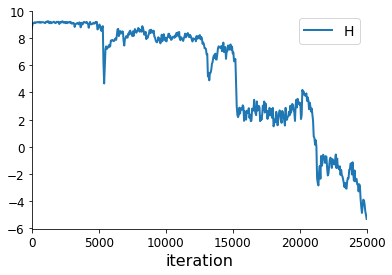

No handles with labels found to put in legend.


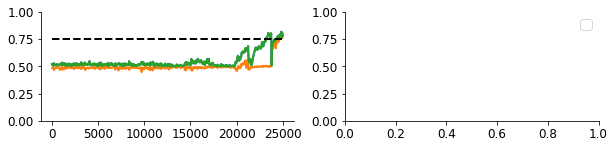

data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs1/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta4.00E+00


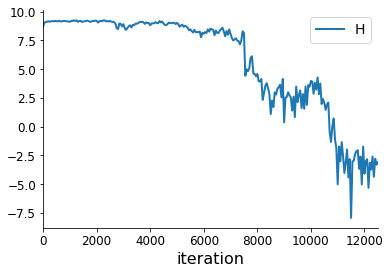

No handles with labels found to put in legend.


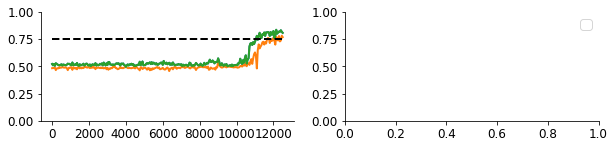

data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs2/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta2.00E+00


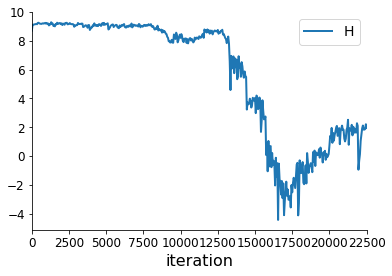

No handles with labels found to put in legend.


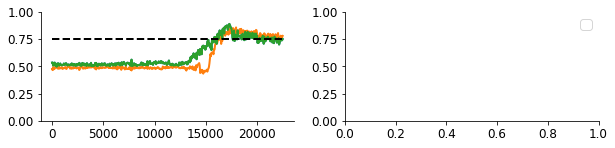

data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs2/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta4.00E+00


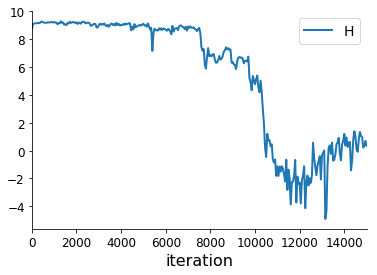

No handles with labels found to put in legend.


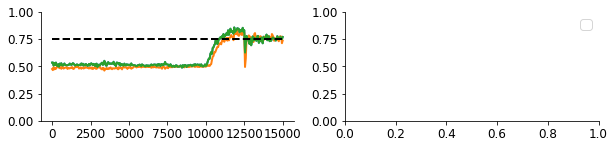

In [16]:
p = 0.75
mu =  np.array([p, 1-p])
epi_df2 = epi_df[(epi_df['p']==p) & (epi_df['c0']==1e1) & (epi_df['mu_len'] == 2)]


paths = sorted(epi_df2['path'].unique())
for i, path in enumerate(paths):
    print(path)
    epi_df2 = epi_df[epi_df['path'] == path]
    epi_df2.plot('iteration', 'H')
    plt.show()
    fig, axs = plt.subplots(1,2,figsize=(10,2))
    Rs = ['R%d' % r for r in range(1,3)]
    axs[0].plot(epi_df2['iteration'], epi_df2['R1'] + mu[0], label=r'$p_P$')
    axs[0].plot(epi_df2['iteration'], 1.-(epi_df2['R2'] + mu[1]), label=r'$p_A$')
    axs[0].plot(epi_df2['iteration'], epi_df2['R1'] + mu[0], label=r'$p_P$')
    axs[0].plot([0, epi_df2['iteration'].max()], [mu[0], mu[0]], 'k--')
    axs[0].set_ylim([0,1])
    #axs[1].plot(epi_df2['iteration'], epi_df2['R3'], label=r'var $p_P$')
    #axs[1].plot(epi_df2['iteration'], epi_df2['R4'], label=r'var $p_A$')
    #axs[1].plot([epi_df2['iteration'].min(), epi_df2['iteration'].max()], [mu_std**2, mu_std**2], 'k--')
    plt.legend()
    plt.show()

In [22]:
for path in paths:
    print(path)

data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs1/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta2.00E+00
data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs1/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta4.00E+00
data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs2/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta2.00E+00
data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs2/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta4.00E+00


In [26]:
best_Hs = []
convergeds = []
best_ks = []
nu = 0.25
"""for i, path in enumerate(paths[2:3]):
    _epi_df = epi_df[epi_df['path'] == path]
    df_row = _epi_df.iloc[0]
    init = df_row['init']
    init_params = {"mu":init["mu"], "Sigma":init["Sigma"]}
    nf = model._df_row_to_nf(df_row)
    aug_lag_hps = model._df_row_to_al_hps(df_row)
    best_k, converged, best_H = model.get_convergence_epoch(init_params, nf, mu, aug_lag_hps, 
                                    alpha=0.05, nu=nu)
    best_Hs.append(best_H)
    convergeds.append(converged)
    best_ks.append(best_k)"""


bestHs = np.array(best_Hs)
best_ks = np.array(best_ks)

best_Hs = np.array([x if x is not None else np.nan for x in best_Hs])
ind = np.nanargmax(best_Hs)

path = paths[ind]
best_k = int(best_ks[ind])
best_H = best_Hs[ind]

In [40]:
path = paths[2]
best_k = 9
print('ind', ind, path)
print('best k', best_k)
        
mu = np.array([p, 1.-p])

_epi_df = epi_df[epi_df['path'] == path]
df_row = _epi_df.iloc[0]
init = df_row['init']
init_params = {"mu":init["mu"], "Sigma":init["Sigma"]}
nf = model._df_row_to_nf(df_row)
aug_lag_hps = model._df_row_to_al_hps(df_row)

dist = model._get_epi_dist(best_k, init_params, nf, mu, aug_lag_hps)
print('dist', dist)

ind 0 data/epi/SC_Circuit/a2c18082e7d1e33948198182605af211/D4_C3_L2_U50_bnmom=9.90E-01_PA_rs2/f1c76a7af74bf78f96682bd2fc852d21/N100_lr1.00E-03_c0=1.00E+01_gamma2.50E-01_beta2.00E+00
best k 9
dist <epi.models.Distribution object at 0x7fc22020d128>


Text(0,0.5,'$p_A$')

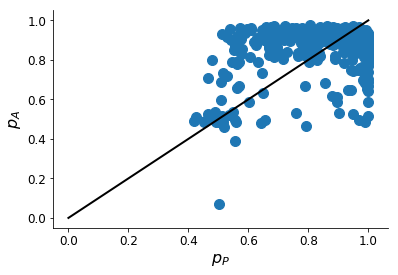

In [48]:
z = dist(500)
log_q_z = dist.log_prob(z)
"""M = 500
z = np.zeros((M, model.D), dtype=np.float32)
for j in range(model.D):
    z[:,j] = np.random.uniform(model.parameters[j].lb, model.parameters[j].ub, (M,))"""
T_x = model.eps(z).numpy()
plt.scatter(T_x[:,0], 1-T_x[:,1])
plt.plot([0,1], [0,1], 'k-')
plt.xlabel(r'$p_P$')
plt.ylabel(r'$p_A$')

In [49]:
mu_star = np.array([0.75, 0.25])[None,:]
d = np.linalg.norm(T_x-mu_star, axis=1)
min_ind = np.argmin(d)
z_star = z[min_ind, :][None,:]
print(z_star)
print(d[min_ind], T_x[min_ind])


[[-1.3971648 -3.8365638 -2.1901758 -1.8108326]]
0.06469934681418471 [0.71566826 0.1951608 ]


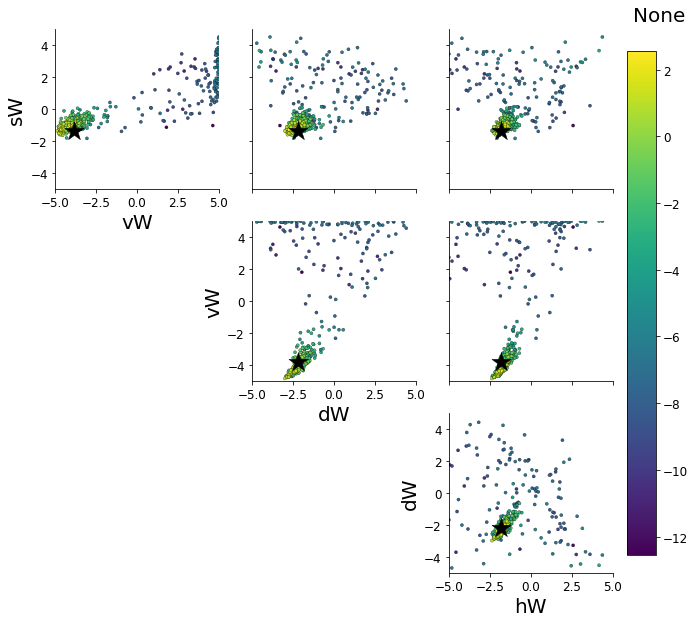

In [56]:
_lb = np.array([p.lb[0] for p in model.parameters])
_ub = np.array([p.ub[0] for p in model.parameters])
z_labels = [p.name for p in model.parameters]
fig = pairplot(z, np.arange(4), z_labels, starred=z_star,
               fontsize=20, figsize=(10,10),
               lb=_lb, ub=_ub, c=log_q_z)

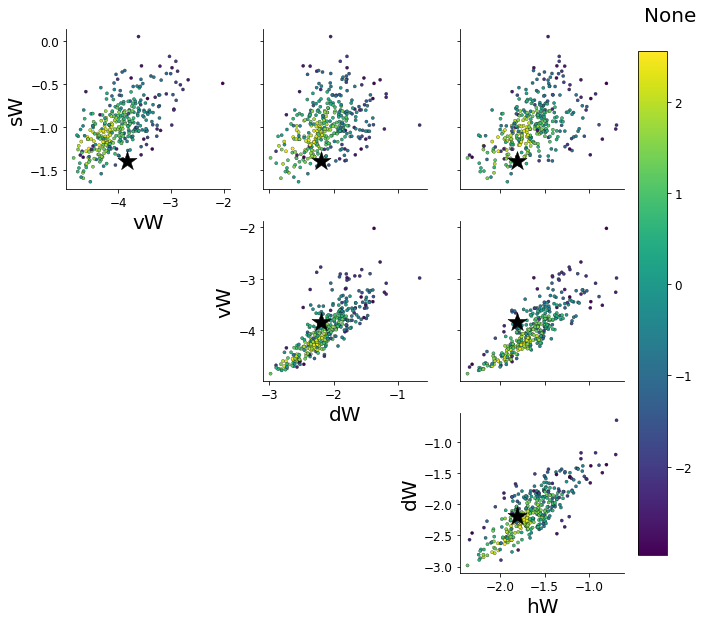

In [59]:
_lb = np.array([p.lb[0] for p in model.parameters])
_ub = np.array([p.ub[0] for p in model.parameters])
z_labels = [p.name for p in model.parameters]
plot_inds = log_q_z > -3.
z_plot = z[plot_inds]
log_q_z_plot = log_q_z[plot_inds]
T_x_plot = T_x[plot_inds]
fig = pairplot(z_plot, np.arange(4), z_labels, starred=z_star,
               fontsize=20, figsize=(10,10),
               c=log_q_z_plot)

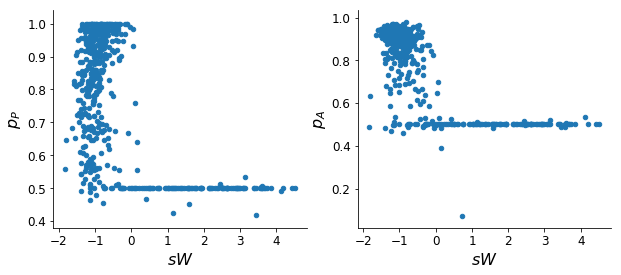

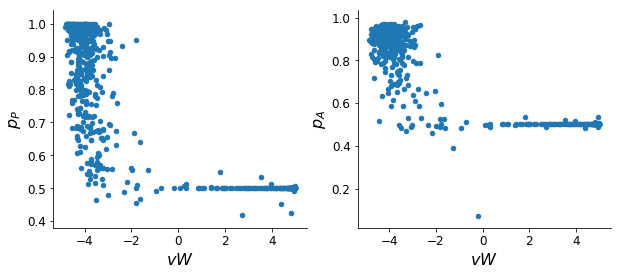

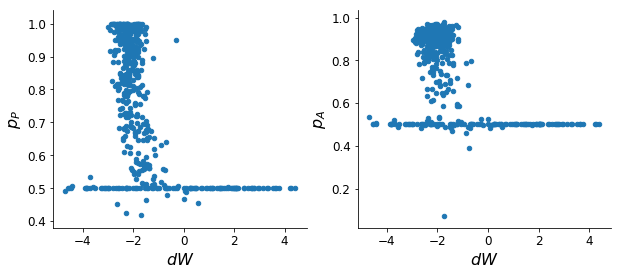

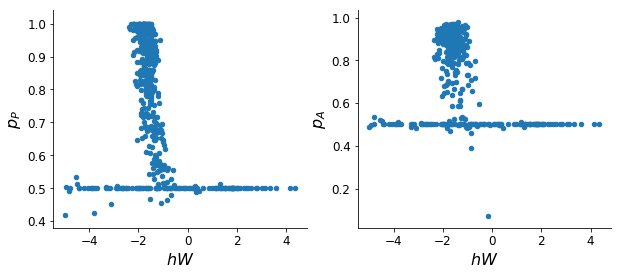

In [79]:
sW = z[:,0]
vW = z[:,1]
dW = z[:,2]
hW = z[:,3]
pP = T_x[:,0]
pA = 1. - T_x[:,1]

def plot_p_corrs(x, xlabel, pP, pA):
    fig, axs = plt.subplots(1,2,figsize=(10,4))
    axs[0].scatter(x, pP, s=20)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(r'$p_P$')
    axs[1].scatter(x, pA, s=20)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(r'$p_A$')
    plt.show()
    
    
plot_p_corrs(sW, r'$sW$', pP, pA)
plot_p_corrs(vW, r'$vW$', pP, pA)
plot_p_corrs(dW, r'$dW$', pP, pA)
plot_p_corrs(hW, r'$hW$', pP, pA)

In [80]:
Wrow1 = tf.stack([sW, vW, dW, hW], axis=1)
Wrow2 = tf.stack([vW, sW, hW, dW], axis=1)
Wrow3 = tf.stack([dW, hW, sW, vW], axis=1)
Wrow4 = tf.stack([hW, dW, vW, sW], axis=1)

W = tf.stack([Wrow1, Wrow2, Wrow3, Wrow4], axis=1)

def get_schur_eigs(W):
    # returns 
    T, Z = scipy.linalg.schur(W)
    b = Z.copy()
    b[b<0.0] = -1
    b[b>0.0] = 1
    modes = 0.25*np.array([[1.0, 1.0, 1.0, 1.0],   # all mode
                          [-1.0, -1.0, 1.0, 1.0], # side mode
                          [1.0, -1.0, -1.0, 1.0], # task mode
                          [-1.0, 1.0, -1.0, 1.0]]) # diag mode
    X = np.abs(np.dot(modes,b))  # (template_mode x z_col)
    eigs = np.zeros((4,))
    for i in range(4):
        z_ind = np.argmax(X[i] == 1.0)
        eigs[i] = T[z_ind, z_ind]
    return eigs

eigs = np.array([get_schur_eigs(W[i]) for i in range(sW.shape[0])])

In [81]:
print(eigs)

[[-8.96600914 -1.81524491  3.04219437  2.72677898]
 [-8.4684639  -1.10933459  3.73359871  2.74006224]
 [-8.95902824 -0.9473477   3.73981452  2.53497577]
 ...
 [-6.51501942 -1.42162812  2.86112261  2.0680449 ]
 [-8.07217312 -0.91483426  2.94398642  2.57905412]
 [-6.90038824 -0.26619402  2.83536005  1.84027171]]


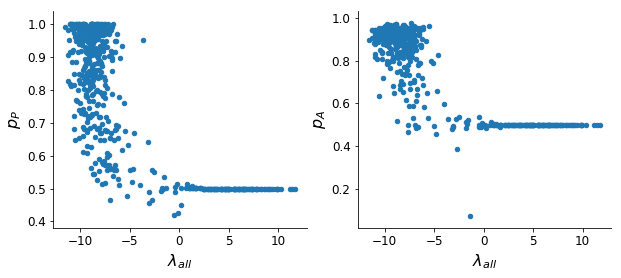

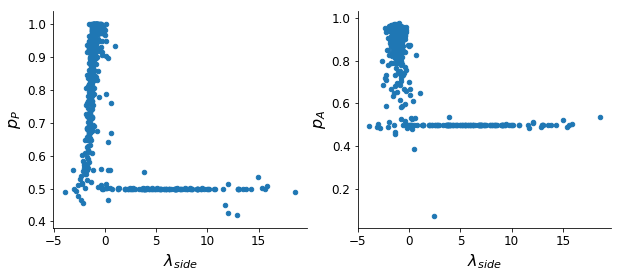

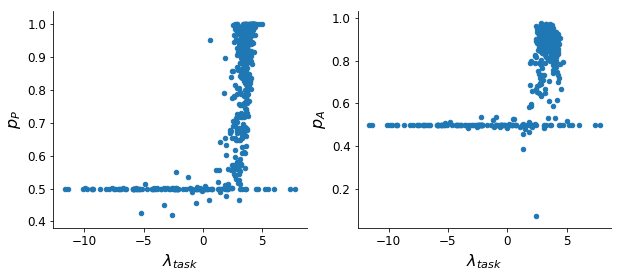

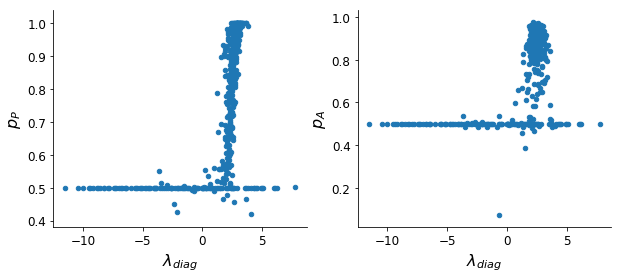

In [82]:
plot_p_corrs(eigs[:,0], r'$\lambda_{all}$', pP, pA)
plot_p_corrs(eigs[:,1], r'$\lambda_{side}$', pP, pA)
plot_p_corrs(eigs[:,2], r'$\lambda_{task}$', pP, pA)
plot_p_corrs(eigs[:,3], r'$\lambda_{diag}$', pP, pA)

(500, 4)


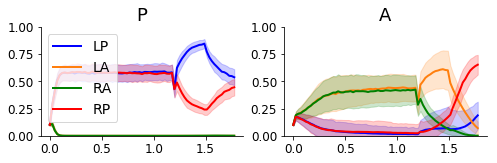

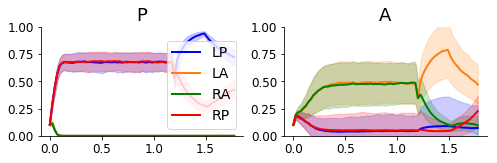

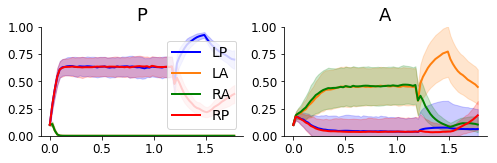

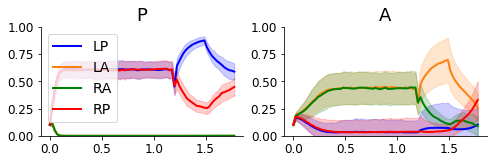

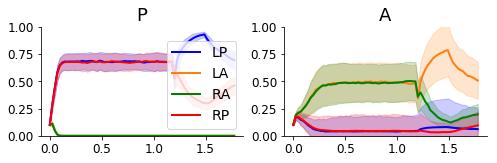

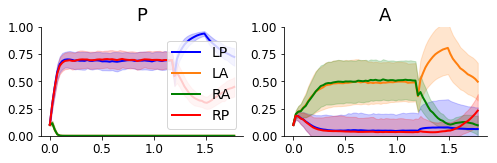

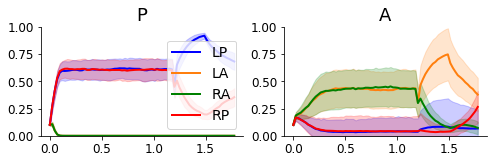

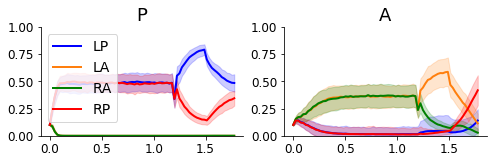

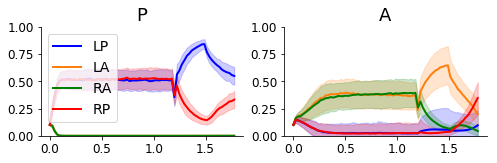

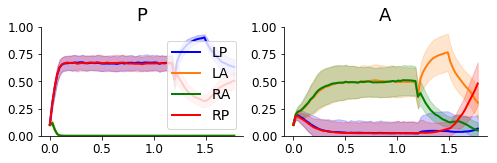

In [47]:
print(z.shape)
u_t, v_t = SC_sim(*unwrap(z))

t_cue_delay = 1.2
t_choice = 0.3
t_post_choice = 0.3
t_total = t_cue_delay + t_choice + t_post_choice
dt = 0.024
t = np.arange(0.0, t_total, dt)
T = t.shape[0]

neuron_labels = ['LP', 'LA', 'RA', 'RP']
colors = ['b', 'tab:orange', 'g', 'r']
C_titles = ['P', 'A']
for m in range(10):
    fig, axs = plt.subplots(1,2,figsize=(8, 2))
    for c in range(2):
        for i in range(4):
            mean_v = np.mean(v_t[:,m,c,i,:], axis=1)
            std_v = np.std(v_t[:,m,c,i,:], axis=1)
            axs[c].fill_between(t, mean_v - std_v, mean_v + std_v, color=colors[i], alpha=0.2)
            axs[c].plot(t, mean_v, label=neuron_labels[i], c=colors[i])
            axs[c].set_title(C_titles[c])
            axs[c].set_ylim([0,1])
    axs[0].legend()
    plt.show()